<b>Aktywność 6</b><br>
Niezbędne biblioteki: geopandas, pandas, pathlib, pyproj, shapely

<b>Ćwiczenie 1.</b> Na podstawie wartości ze zmiennych longitudes i latitudes utwórz listę krotek zawierających współrzędne o nazwie coordinate_pairs.

In [1]:
longitudes = [29.99671173095703,  31.58196258544922,  27.738052368164062, 26.50013542175293,
              26.652359008789062, 25.921663284301758, 22.90027618408203,  23.257217407226562,
              23.335693359375,    22.87444305419922,  23.08465003967285,  22.565473556518555,
              21.452774047851562, 21.66388702392578,  21.065969467163086, 21.67659568786621,
              21.496871948242188, 22.339998245239258, 22.288192749023438, 24.539581298828125,
              25.444232940673828, 25.303749084472656, 24.669166564941406, 24.689163208007812,
              24.174999237060547, 23.68471908569336,  24.000761032104492, 23.57332992553711,
              23.76513671875,     23.430830001831055, 23.6597900390625,   20.580928802490234,
              21.320831298828125, 22.398330688476562, 23.97638702392578,  24.934917449951172,
              25.7611083984375,   25.95930290222168,  26.476804733276367, 27.91069221496582,
              29.1027774810791,   29.29846954345703,  28.4355525970459,   28.817358016967773,
              28.459857940673828, 30.028610229492188, 29.075136184692383, 30.13492774963379,
              29.818885803222656, 29.640830993652344, 30.57735824584961,  29.99671173095703]
latitudes  = [63.748023986816406, 62.90789794921875,  60.511383056640625, 60.44499588012695,
              60.646385192871094, 60.243743896484375, 59.806800842285156, 59.91944122314453,
              60.02395248413086,  60.14555358886719,  60.3452033996582,   60.211936950683594,
              60.56249237060547,  61.54027557373047,  62.59798049926758,  63.02013397216797,
              63.20353698730469,  63.27652359008789,  63.525691986083984, 64.79915618896484,
              64.9533920288086,   65.51513671875,     65.65470886230469,  65.89610290527344,
              65.79151916503906,  66.26332092285156,  66.80228424072266,  67.1570053100586,
              67.4168701171875,   67.47978210449219,  67.94589233398438,  69.060302734375,
              69.32611083984375,  68.71110534667969,  68.83248901367188,  68.580810546875,
              68.98916625976562,  69.68568420410156,  69.9363784790039,   70.08860778808594,
              69.70597076416016,  69.48533630371094,  68.90263366699219,  68.84700012207031,
              68.53485107421875,  67.69471740722656,  66.90360260009766,  65.70887756347656,
              65.6533203125,      64.92096710205078,  64.22373962402344,  63.748023986816406]

In [2]:
### your code ###
coordinate_pairs = list(zip(longitudes, latitudes))

Zweryfikuj poprawność kodu.

In [3]:
print(coordinate_pairs[0])

(29.99671173095703, 63.748023986816406)


<b>Ćwiczenie 2.</b> Utwórz obiekt typu Polygon o nazwie polygon wykorzystując zmienną coordinate_pairs.

In [5]:
from shapely.geometry import Polygon
polygon = Polygon(coordinate_pairs)
### your code ###

Zweryfikuj poprawność kodu.

In [6]:
print(polygon.geom_type)

Polygon


<b>Ćwiczenie 3.</b> Utwórz obiekt typu GeoDataFrame o nazwie geo i układzie współrzędnych EPSG:4326 zawierający kolumnę o nazwie geometry. Wczytaj tam wielokąt o nazwie polygon.

In [7]:
import geopandas as gpd
geo = gpd.GeoDataFrame({'geometry': [polygon]}, crs="EPSG:4326")
### your code ###

Zweryfikuj poprawność kodu.

In [8]:
geo.head()

,geometry
0,"POLYGON ((29.99671 63.74802, 31.58196 62.9079,..."


<b>Ćwiczenie 4.</b> Zwizualizuj wielokąt.

<Axes: >

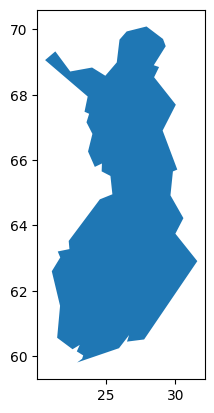

In [17]:
### your code ###
geo.plot()

<b>Ćwiczenie 5.</b> Zapisz plik w formacie GeoPackage pod nazwą ``mysterious-polygon.gpkg``.

In [18]:
### your code ###
geo.to_file("mysterious-polygon.gpkg", driver="GPKG")

In [19]:
import pathlib

assert (pathlib.Path().resolve() / "mysterious-polygon.gpkg").exists(), "Plik nie został zapisany!"

<b>Ćwiczenie 6.</b> Wczytaj dane z pliku ``some_posts.csv`` do obiektu typu DataFrame o nazwie data.

In [20]:
import pandas as pd

### your code ###
data = pd.read_csv('some_posts.csv')

Zweryfikuj poprawność kodu.

In [24]:
print(f"Number of rows: {len(data)}")
print(data)

Number of rows: 81379
             lat        lon         timestamp    userid
0     -24.980792  31.484633  2015-07-07 03:02  66487960
1     -25.499225  31.508906  2015-07-07 03:18  65281761
2     -24.342578  30.930866  2015-03-07 03:38  90916112
3     -24.854614  31.519718  2015-10-07 05:04  37959089
4     -24.921069  31.520836  2015-10-07 05:19  27793716
...          ...        ...               ...       ...
81374 -24.799541  31.354469  2015-09-05 02:23  90744213
81375 -25.467992  30.956033  2015-02-05 02:40  71109799
81376 -25.332223  30.997409  2015-08-05 02:40  54796261
81377 -25.508851  31.005536  2015-08-05 02:43  78762204
81378 -25.498840  31.007430  2015-04-05 02:44  32190273

[81379 rows x 4 columns]


<b>Ćwiczenie 7.</b> Do zmiennej data dodaj kolumnę o nazwie geometry. Wstaw do niej obiekty typu Point na podstawie kolumn lon i lat.

In [25]:
from shapely.geometry import Point

### your code ###
data['geometry'] = data.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

Zweryfikuj poprawność kodu.

In [26]:
data['geometry'].head()

0    POINT (31.484633302 -24.980792492)
1    POINT (31.508905612 -25.499224667)
2    POINT (30.930866066 -24.342578456)
3     POINT (31.519718439 -24.85461393)
4    POINT (31.520835558 -24.921068894)
Name: geometry, dtype: object

<b>Ćwiczenie 8.</b> Przekonwertuj obiekt typu DataFrame na obiekt typu GeoDataFrame. Ustaw przestrzenny układ odniesienia na EPSG:4326.

In [28]:
### your code ###
data = gpd.GeoDataFrame(data, geometry='geometry', crs="EPSG:4326")

Zweryfikuj poprawność kodu.

In [29]:
data

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (31.48463 -24.98079)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (31.50891 -25.49922)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (30.93087 -24.34258)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (31.51972 -24.85461)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (31.52084 -24.92107)
...,...,...,...,...,...
81374,-24.799541,31.354469,2015-09-05 02:23,90744213,POINT (31.35447 -24.79954)
81375,-25.467992,30.956033,2015-02-05 02:40,71109799,POINT (30.95603 -25.46799)
81376,-25.332223,30.997409,2015-08-05 02:40,54796261,POINT (30.99741 -25.33222)
81377,-25.508851,31.005536,2015-08-05 02:43,78762204,POINT (31.00554 -25.50885)


In [30]:
print(data.crs)

EPSG:4326


<b>Ćwiczenie 9.</b> Zapisz plik w formacie Shapefile pod nazwą ``kruger_points.shp``.

In [31]:
### your code ###
data.to_file("kruger_points-polygon.shp", driver="ESRI Shapefile")

Zweryfikuj poprawność kodu.

In [32]:
import pathlib

assert (pathlib.Path().resolve() / "kruger_points-polygon.shp").exists(), "Plik nie został zapisany!"

<b>Ćwiczenie 10.</b> Zwizualizuj punkty.

<Axes: >

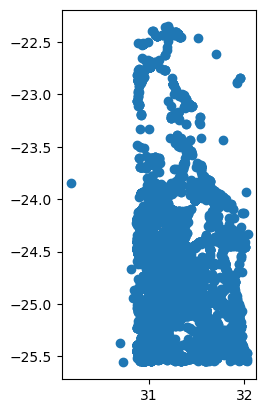

In [34]:
### your code ###
data.plot()

<b>Ćwiczenie 11.</b> Wczytaj dane z pliku ``kruger_points.shp`` do obiektu typu GeoDataFrame o nazwie kruger_points.

In [35]:
### your code ###
kruger_points = gpd.read_file('kruger_points-polygon.shp')

Zweryfikuj poprawność kodu.

In [36]:
kruger_points.head()

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (31.48463 -24.98079)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (31.50891 -25.49922)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (30.93087 -24.34258)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (31.51972 -24.85461)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (31.52084 -24.92107)


<b>Ćwiczenie 12.</b> Przeprowadź projekcję danych na układ odniesienia EPSG:32735, w którym domyślną jednostką są metry.

In [37]:
### your code ###
kruger_points = kruger_points.to_crs(epsg=32735)

Zweryfikuj poprawność kodu.

In [38]:
import pyproj

assert kruger_points.crs == pyproj.CRS("EPSG:32735"), "Błędnie wykonana projekcja!"

<b>Ćwiczenie 13.</b> Pogrupuj dane po kolumnie userid w zmiennej o nazwie grouped_by_users.

In [39]:
### your code ###
grouped_by_users = kruger_points.groupby('userid')

Zweryfikuj poprawność kodu.

In [44]:
assert len(grouped_by_users.groups) == kruger_points["userid"].nunique(), "Błędna liczba grup!"

<b>Ćwiczenie 14.</b> Dla każdego użytkownika posortuj rezultaty po kolumnie timestamp i utwórz obiekt typu LineString na podstawie jego punktów. Pamiętaj, aby pominąć użytkowników, którzy posiadają mniej niż dwa punkty. Rezultaty (zawierające kolumny userid oraz geometry) zapisz w obiekcie typu GeoDataFrame o nazwie movements. Pamiętaj o weryfikacji układu odniesienia.

In [56]:
from shapely.geometry import LineString

### your code ###
lines = []
for userid, group in grouped_by_users:
    group = group.sort_values('timestamp')
    if len(group) > 1:
        line = LineString(group.geometry.tolist())
        lines.append({'userid': userid, 'geometry': line})
        
movements = gpd.GeoDataFrame(lines, crs=kruger_points.crs)
assert movements.crs == kruger_points.crs, "Niepoprawny CRS!"

Zweryfikuj poprawność kodu.

In [57]:
movements

,userid,geometry
0,16301,"LINESTRING (942231.63 7254606.868, 938934.725 ..."
1,45136,"LINESTRING (905394.5 7193375.148, 905394.5 719..."
2,50136,"LINESTRING (944551.607 7253384.183, 963788.403..."
3,88775,"LINESTRING (902800.817 7192546.975, 902800.839..."
4,88918,"LINESTRING (959332.961 7219877.715, 963788.403..."
...,...,...
9021,99921781,"LINESTRING (902885.19 7196931.096, 904027.71 7..."
9022,99936874,"LINESTRING (963782.211 7228000.079, 963754.402..."
9023,99964140,"LINESTRING (938876.653 7305143.369, 938876.943..."
9024,99986933,"LINESTRING (935937.029 7305973.536, 936598.681..."


<b>Ćwiczenie 15.</b> Dodaj kolumnę o nazwie distance, która będzie przechowywać długość linii.

In [59]:
### your code ###
movements['distance'] = movements['geometry'].length


Zweryfikuj poprawność kodu.

In [60]:
movements.head()

,userid,geometry,distance
0,16301,"LINESTRING (942231.63 7254606.868, 938934.725 ...",328455.115430
1,45136,"LINESTRING (905394.5 7193375.148, 905394.5 719...",0.000000
2,50136,"LINESTRING (944551.607 7253384.183, 963788.403...",159189.081019
3,88775,"LINESTRING (902800.817 7192546.975, 902800.839...",0.080245
4,88918,"LINESTRING (959332.961 7219877.715, 963788.403...",9277.252211


<b>Ćwiczenie 16.</b> Odpowiedz na poniższe pytania i zapisz ich rezultaty w podanych zmiennych:<br/>
1. Jaki był najkrótszy dystans pokonany przez użytkownika (shortest_distance)?<br/>
2. Jaki był średni dystans pokonany przez użytkownika (mean_distance)?<br/>
3. Jaki był najdłuższy dystans pokonany przez użytkownika (longest_distance)?<br/>

In [61]:
### your code ###
shortest_distance = movements['distance'].min()
print(shortest_distance)
mean_distance = movements['distance'].mean()
print(mean_distance)
longest_distance = movements['distance'].max()
print(longest_distance)

0.0
107133.51202944393
6970668.816343964


<b>Ćwiczenie 17.</b> Zapisz plik w formacie Shapefile pod nazwą ``movements.shp``.

In [52]:
### your code ###
movements.to_file("movements.shp", driver="ESRI Shapefile")

Zweryfikuj poprawność kodu.

In [53]:
assert (pathlib.Path().resolve() / "movements.shp").exists(), "Plik nie został zapisany!"